In [ ]:
import pandas as pd
data = pd.read_csv('Campusdata.csv')
import warnings 
warnings.filterwarnings('ignore')
data.head()

,sl_no,Name,gender,10_score,10_board,12_score,12_board,12_stream,undergrad_score,undergrad_stream,workex,attended_grad,status,salary
0,1,Rahul,M,92.02,Others,91.00,Others,Science,93.45,Sci&Tech,No,Yes,Placed,1200000.0
1,2,Aditi,F,79.33,Central,78.33,Others,Science,73.52,Sci&Tech,Yes,No,Placed,450000.0
2,3,Amit,M,65.00,Central,68.00,Central,Arts,64.42,Comm&Mgmt,No,Yes,Placed,250000.0
3,4,Sara,F,83.60,Central,72.00,Central,Science,71.63,Sci&Tech,No,Yes,Not Placed,NaN
4,5,Krishna,M,85.80,Central,73.60,Central,Commerce,70.65,Comm&Mgmt,Yes,Yes,Placed,425000.0


In [ ]:
data = data.drop(['sl_no','Name'],axis=1)

In [7]:
backup_salary_column = data['salary']  # Keep a backup of the 'salary' column
# Drop the 'salary' column
data = data.drop('salary', axis=1)

In [8]:
data['gender'] = data['gender'].map({'M':1,'F':0})

In [9]:
data['10_board'] = data['10_board'].map({'Central':1,'Others':0})

In [10]:
data['12_board'] = data['12_board'].map({'Central':1,'Others':0})

In [11]:
data['12_stream'] = data['12_stream'].map({'Science':2,'Commerce':1,'Arts':0})

In [12]:
data['undergrad_stream'] = data['undergrad_stream'].map({'Sci&Tech':2,'Comm&Mgmt':1,'Others':0})

In [13]:
data['attended_grad'] = data['attended_grad'].map({'Yes':1,'No':0})

In [14]:
data['workex'] = data['workex'].map({'Yes':1,'No':0})

In [15]:
data['status'] = data['status'].map({'Placed':1,'Not Placed':0})

In [16]:
data.head()

,gender,10_score,10_board,12_score,12_board,12_stream,undergrad_score,undergrad_stream,workex,attended_grad,status
0,1,92.02,0,91.00,0,2,93.45,2,0,1,1
1,0,79.33,1,78.33,0,2,73.52,2,1,0,1
2,1,65.00,1,68.00,1,0,64.42,1,0,1,1
3,0,83.60,1,72.00,1,2,71.63,2,0,1,0
4,1,85.80,1,73.60,1,1,70.65,1,1,1,1


In [17]:
from sklearn.preprocessing import MinMaxScaler
file_path = "Campusdata2.csv"
# Assuming df is your DataFrame
columns_to_scale = ['10_score', '12_score', 'undergrad_score']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected columns
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

# Save the DataFrame to CSV
data.to_csv(file_path, index=False)


In [18]:
X = data.drop('status',axis=1)
y= data['status']

In [19]:
y

0      1
1      1
2      1
3      0
4      1
      ..
167    1
168    0
169    1
170    1
171    0
Name: status, Length: 172, dtype: int64

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming 'X' is your feature matrix and 'y' is the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Predictions
y_pred = logistic_model.predict(X_test)

# Evaluate accuracy
score1 = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {score1}')


Logistic Regression Accuracy: 0.8571428571428571


In [21]:
from sklearn.svm import SVC

# Initialize the model
model = SVC()

# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
score2 = accuracy_score(y_test, predictions)
print(f'Accuracy: {score2}')

Accuracy: 0.8


In [22]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the model
model = KNeighborsClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
score3 = accuracy_score(y_test, predictions)
print(f'Accuracy: {score3}')


Accuracy: 0.8285714285714286


In [23]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
model = DecisionTreeClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
score4 = accuracy_score(y_test, predictions)
print(f'Accuracy: {score4}')

Accuracy: 0.7714285714285715


In [24]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
score5 = accuracy_score(y_test, predictions)
print(f'Accuracy: {score5}')

Accuracy: 0.8571428571428571


In [25]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the model
model = GradientBoostingClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
score6 = accuracy_score(y_test, predictions)
print(f'Accuracy: {score6}')


Accuracy: 0.8571428571428571


In [26]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

# Min-Max Scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the model
model = MLPClassifier(hidden_layer_sizes=(100, ), max_iter=500)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions
predictions = model.predict(X_test_scaled)

# Evaluate the model
score7 = accuracy_score(y_test, predictions)
print(f'Accuracy: {score7}')


Accuracy: 0.8285714285714286


In [27]:
from xgboost import XGBClassifier

# Initialize the model
model = XGBClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
score8 = accuracy_score(y_test, predictions)
print(f'Accuracy: {score8}')


Accuracy: 0.8


In [35]:
print(score1,score2,score3,score4,score5,score6,score7,score8)

0.8571428571428571 0.8 0.8285714285714286 0.7714285714285715 0.8571428571428571 0.8571428571428571 0.8285714285714286 0.8


In [36]:
final_data = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GB','NN','XGB'],
            'ACC':[score1*100,
                  score2*100,
                  score3*100,
                  score4*100,
                  score5*100,score6*100,score7*100,score8*100]})

In [37]:
final_data

,Models,ACC
0,LR,85.714286
1,SVC,80.000000
2,KNN,82.857143
3,DT,77.142857
4,RF,85.714286
5,GB,85.714286
6,NN,82.857143
7,XGB,80.000000


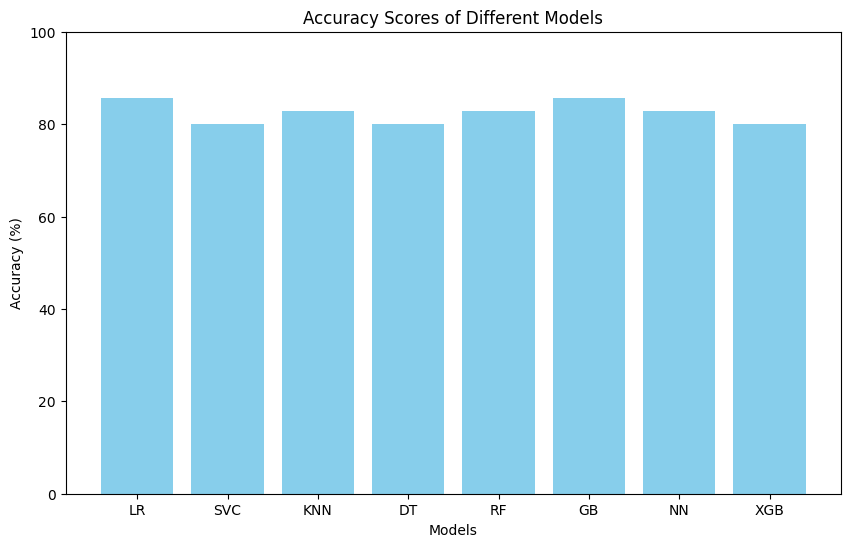

In [52]:
import matplotlib.pyplot as plt

# Assuming final_data is your DataFrame
final_data = pd.DataFrame({
    'Models': ['LR', 'SVC', 'KNN', 'DT', 'RF', 'GB', 'NN', 'XGB'],
    'ACC': [score1 * 100, score2 * 100, score3 * 100, score4 * 100, score5 * 100, score6 * 100, score7 * 100, score8 * 100]
})

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(final_data['Models'], final_data['ACC'], color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Scores of Different Models')
plt.ylim(0, 100)  # Set y-axis limits to ensure proper visualization of percentages
plt.show()


In [41]:
new_data1 = pd.DataFrame({
    'gender':0,
    '10_score':0.9,
    '10_board':0,
    '12_score':0.7,
    '12_board':0,
    '12_stream':1,
    'undergrad_score':0.89,
    'undergrad_stream':2,
    'workex':1,
    'attended_grad':1, 
},index=[0]) 

In [42]:
lr= LogisticRegression()
lr.fit(X,y)  

LogisticRegression()

In [43]:
p=lr.predict(new_data1)
prob=lr.predict_proba(new_data1)
if p==1: 
    print('Placed')
    print(f"You will be placed with probability of {prob[0][1]:.2f}")
else:
    print("Not-placed") 

Placed
You will be placed with probability of 0.98


In [44]:
new_data2 = pd.DataFrame({
    'gender':1,
    '10_score':0.25,
    '10_board':1,
    '12_score':0.27,
    '12_board':1,
    '12_stream':1,
    'undergrad_score':0.35,
    'undergrad_stream':1,
    'workex':1,
    'attended_grad':1, 
},index=[0])

In [45]:
lr= LogisticRegression()
lr.fit(X,y) 

LogisticRegression()

In [46]:
p=lr.predict(new_data2)
prob=lr.predict_proba(new_data2)
if p==1:
    print('Placed')
    print(f"You will be placed with probability of {prob[0][1]:.2f}")
else:
    print("Not-placed") 

Not-placed


In [47]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)


KNeighborsClassifier()

In [48]:
p=knn.predict(new_data2)
prob=knn.predict_proba(new_data2)
if p==1:
    print('Placed')
    print(f"You will be placed with probability of {prob[0][1]:.2f}")
else:
    print("Not-placed")

Not-placed


In [50]:
new_data3 = pd.DataFrame({
    'gender':0,
    '10_score':0.44,
    '10_board':0,
    '12_score':0.34,
    '12_board':0,
    '12_stream':2,
    'undergrad_score':0.98,
    'undergrad_stream':0,
    'workex':0,
    'attended_grad':1, 
},index=[0])

In [51]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [52]:
p=knn.predict(new_data3)
prob=knn.predict_proba(new_data3)
if p==1: 
    print('Placed')
    print(f"You will be placed with probability of {prob[0][1]:.2f}")
else:
    print("Not-placed")

Not-placed


In [53]:
prob

array([[0.6, 0.4]])

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Assuming you have your features X and labels y
# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models
lr = LogisticRegression()
svc = SVC() 
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
nn = MLPClassifier()
xgb = XGBClassifier()

# List of models
models = [lr, svc, knn, dt, rf, gb, nn, xgb]

# Initialize lists to store training and validation scores
train_scores = []
valid_scores = []

# Loop through each model
for model in models:
    # Train the model
    model.fit(X_train, y_train)
    
    # Predictions on training set
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_scores.append(train_accuracy)
    
    # Predictions on validation set
    y_valid_pred = model.predict(X_valid)
    valid_accuracy = accuracy_score(y_valid, y_valid_pred)
    valid_scores.append(valid_accuracy)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Models': ['LR', 'SVC', 'KNN', 'DT', 'RF', 'GB', 'NN', 'XGB'],
    'Training Accuracy': train_scores,
    'Validation Accuracy': valid_scores
})

# Print or visualize the results
print(results_df)

  Models  Training Accuracy  Validation Accuracy
0     LR           0.833333             0.846154
1    SVC           0.891667             0.769231
2    KNN           0.841667             0.769231
3     DT           0.983333             0.788462
4     RF           0.983333             0.826923
5     GB           0.983333             0.788462
6     NN           0.866667             0.846154
7    XGB           0.975000             0.807692


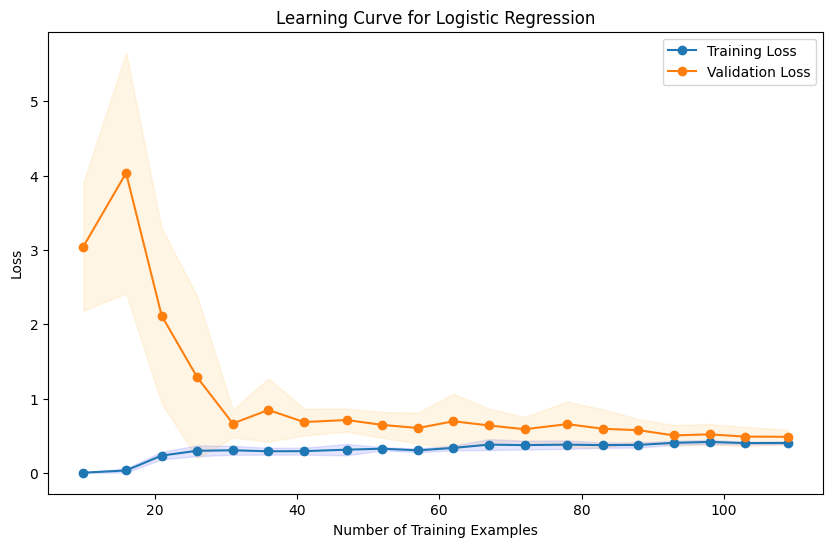

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve

# Assuming 'X' is your feature matrix and 'y' is the target variable
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression(C=1000, random_state=42)

# Plot learning curve with more training examples
train_sizes, train_scores, valid_scores = learning_curve(
    model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 20), cv=5, scoring='neg_log_loss')

# Calculate mean and standard deviation of training and validation scores
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = -np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Loss', marker='o')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='blue')
plt.plot(train_sizes, valid_scores_mean, label='Validation Loss', marker='o')
plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.1, color='orange')

plt.title('Learning Curve for Logistic Regression')
plt.xlabel('Number of Training Examples')
plt.ylabel('Loss')
plt.legend()
plt.show()


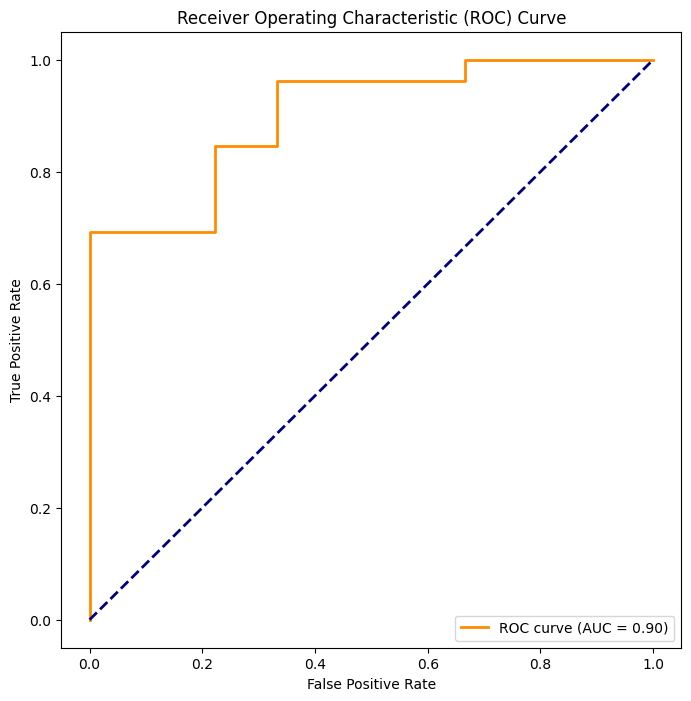

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

# Assuming 'X' is your feature matrix and 'y' is the target variable
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression(C=1000, random_state=42)
model.fit(X_train, y_train)

# Get predicted probabilities for the positive class
y_valid_probs = model.predict_proba(X_valid)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_valid, y_valid_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [59]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, auc

# Assuming 'X' is your feature matrix and 'y' is the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train your logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Get predicted probabilities (scores) for the positive class (class 1)
y_scores = logistic_model.predict_proba(X_test)[:, 1]

# Predict binary labels
y_pred = logistic_model.predict(X_test)

# True labels
y_true = y_test

# Calculate precision and recall
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)

# Alternatively, you can use precision_recall_curve and auc
precision, recall, _ = precision_recall_curve(y_true, y_scores)
pr_auc = auc(recall, precision)

print(f'Precision: {precision[0]:.4f}')
print(f'Recall: {recall[0]:.4f}')
print(f'AUC-PR: {pr_auc:.4f}')

# Calculate F1 score
f1 = f1_score(y_true, y_pred)

print(f'F1 Score: {f1:.4f}')


Precision: 0.7429
Recall: 1.0000
AUC-PR: 0.9410
F1 Score: 0.9057


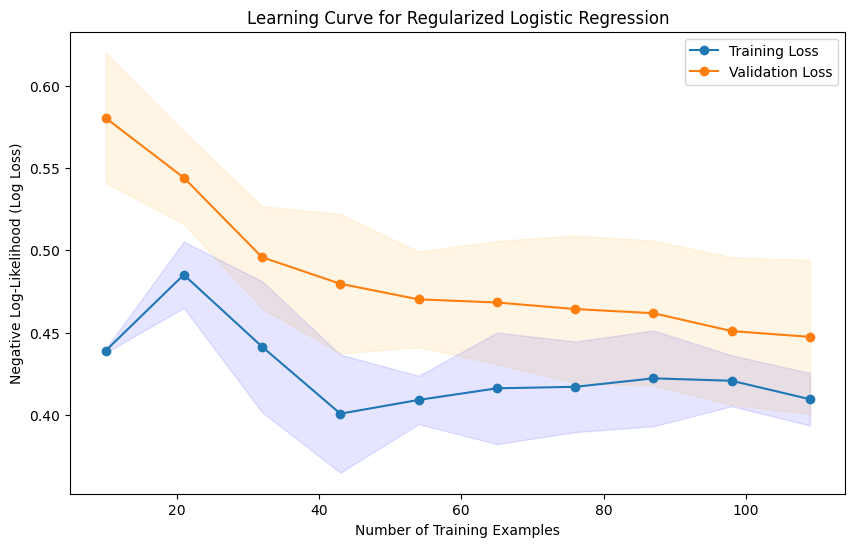

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split

# Assuming 'X' is your feature matrix and 'y' is the target variable
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model with regularization
# Adjust the value of C to control the regularization strength
model = LogisticRegression(C=1, random_state=42)

# Plot learning curve
train_sizes, train_scores, valid_scores = learning_curve(
    model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='neg_log_loss')

# Calculate mean and standard deviation of training and validation scores
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = -np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Loss', marker='o')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='blue')
plt.plot(train_sizes, valid_scores_mean, label='Validation Loss', marker='o')
plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.1, color='orange')

plt.title('Learning Curve for Regularized Logistic Regression')
plt.xlabel('Number of Training Examples')
plt.ylabel('Negative Log-Likelihood (Log Loss)')
plt.legend()
plt.show()


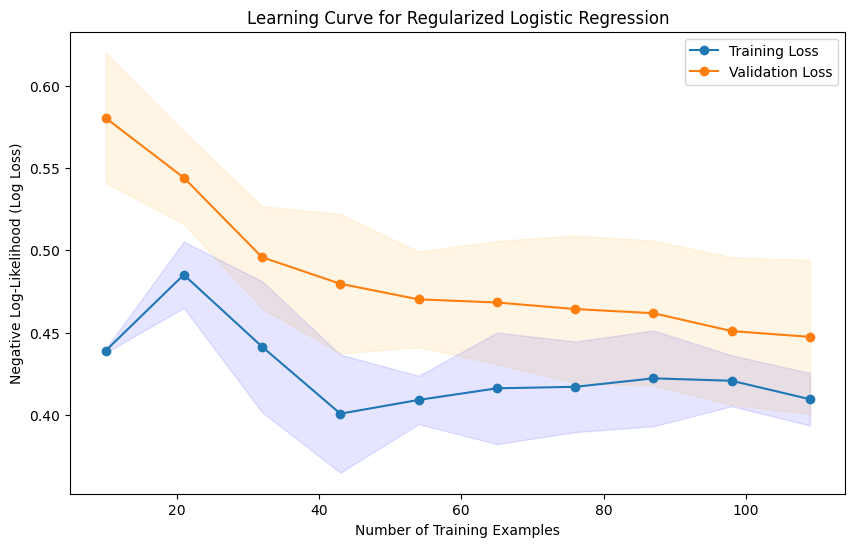

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split

# Assuming 'X' is your feature matrix and 'y' is the target variable
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model with regularization
# Adjust the value of C to control the regularization strength
model = LogisticRegression(C=1, random_state=42)

# Plot learning curve
train_sizes, train_scores, valid_scores = learning_curve(
    model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='neg_log_loss')

# Calculate mean and standard deviation of training and validation scores
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = -np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Loss', marker='o')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='blue')
plt.plot(train_sizes, valid_scores_mean, label='Validation Loss', marker='o')
plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.1, color='orange')

plt.title('Learning Curve for Regularized Logistic Regression')
plt.xlabel('Number of Training Examples')
plt.ylabel('Negative Log-Likelihood (Log Loss)')
plt.legend()
plt.show()


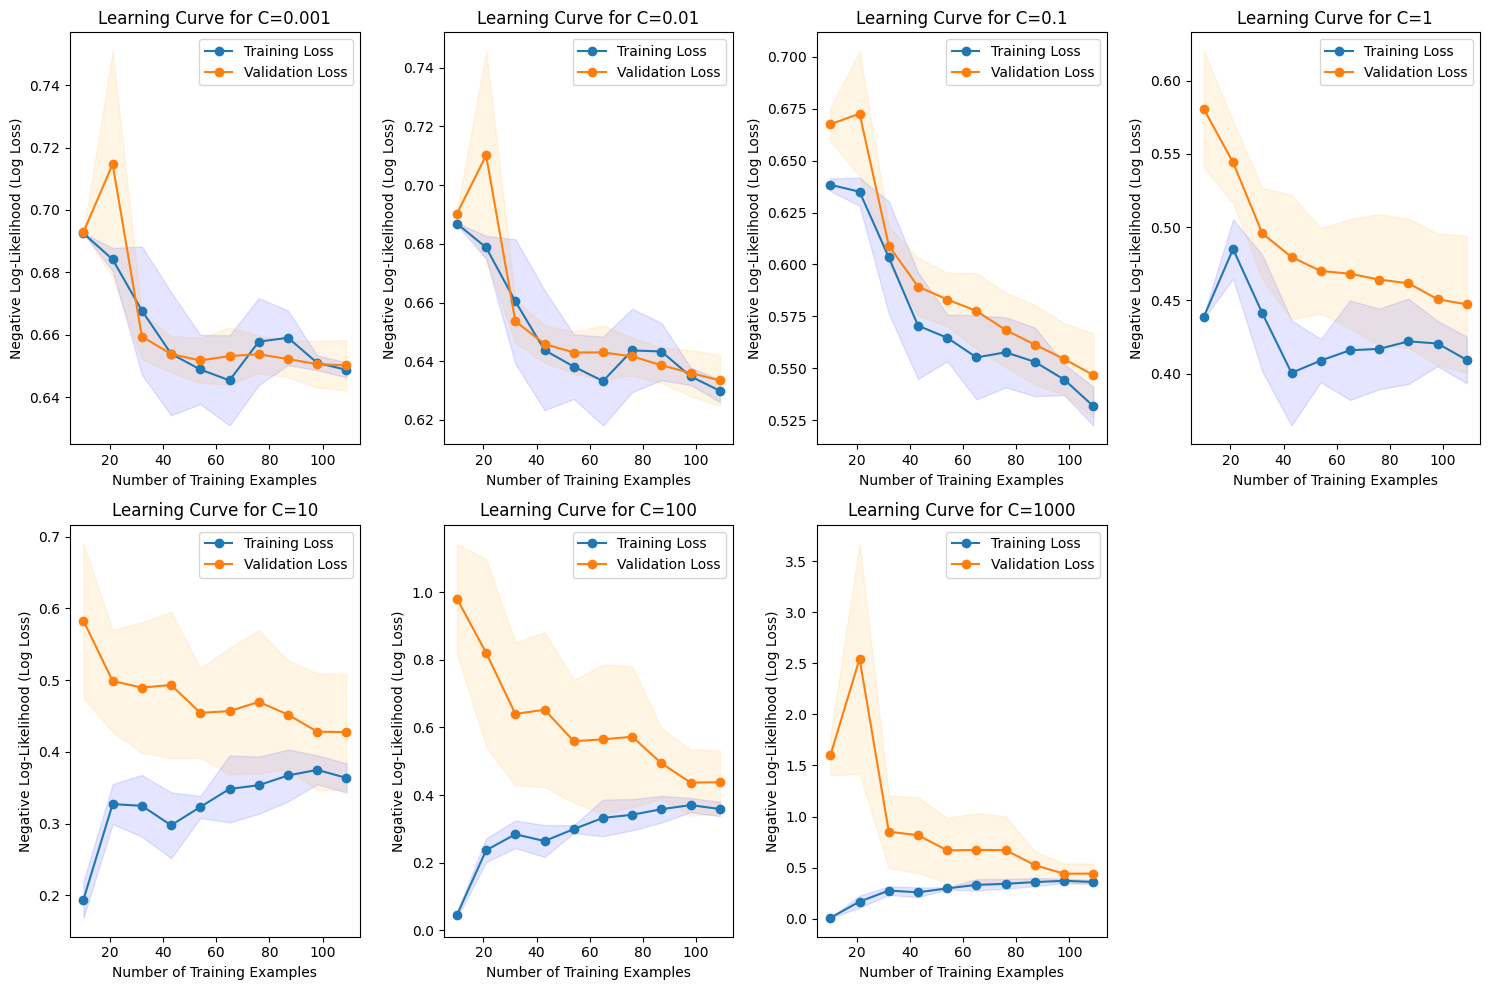

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve, train_test_split

# Assuming 'X' is your feature matrix and 'y' is the target variable
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of values for the regularization parameter 'C'
# Experiment with different values, you can adjust the range and granularity
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Create subplots to display learning curves for different 'C' values
plt.figure(figsize=(15, 10))

for i, C in enumerate(C_values, 1):
    # Create a logistic regression model with the current 'C' value
    model = LogisticRegression(C=C, random_state=42)

    # Plot learning curve
    train_sizes, train_scores, valid_scores = learning_curve(
        model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='neg_log_loss')

    # Calculate mean and standard deviation of training and validation scores
    train_scores_mean = -np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    valid_scores_mean = -np.mean(valid_scores, axis=1)
    valid_scores_std = np.std(valid_scores, axis=1)

    # Plot learning curve for the current 'C' value
    plt.subplot(2, 4, i)
    plt.plot(train_sizes, train_scores_mean, label='Training Loss', marker='o')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color='blue')
    plt.plot(train_sizes, valid_scores_mean, label='Validation Loss', marker='o')
    plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std,
                     valid_scores_mean + valid_scores_std, alpha=0.1, color='orange')

    plt.title(f'Learning Curve for C={C}')
    plt.xlabel('Number of Training Examples')
    plt.ylabel('Negative Log-Likelihood (Log Loss)')
    plt.legend() 

plt.tight_layout()
plt.show()


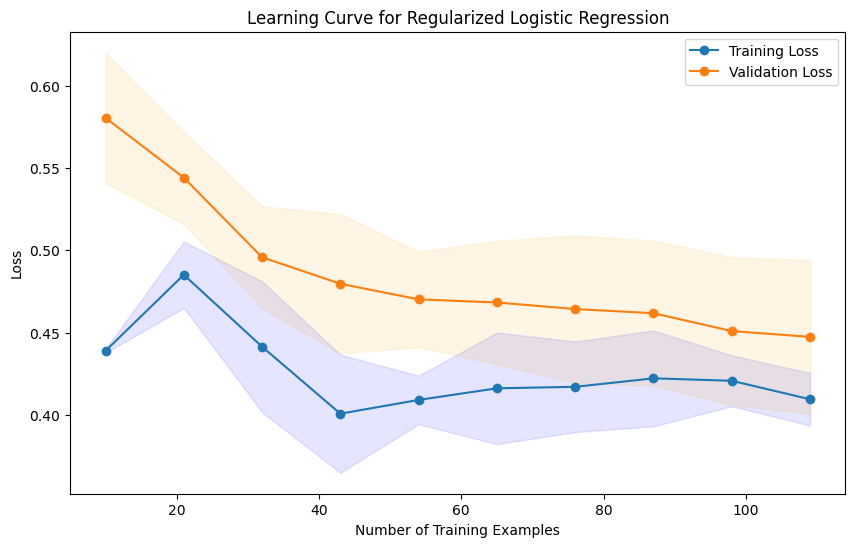

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split

# Assuming 'X' is your feature matrix and 'y' is the target variable
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model with regularization
# Adjust the value of C to control the regularization strength
model = LogisticRegression(C=1, random_state=42)

# Plot learning curve
train_sizes, train_scores, valid_scores = learning_curve(
    model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='neg_log_loss')

# Calculate mean and standard deviation of training and validation scores
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = -np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Loss', marker='o')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='blue')
plt.plot(train_sizes, valid_scores_mean, label='Validation Loss', marker='o')
plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.1, color='orange')

plt.title('Learning Curve for Regularized Logistic Regression')
plt.xlabel('Number of Training Examples')
plt.ylabel('Loss')
plt.legend()
plt.show()


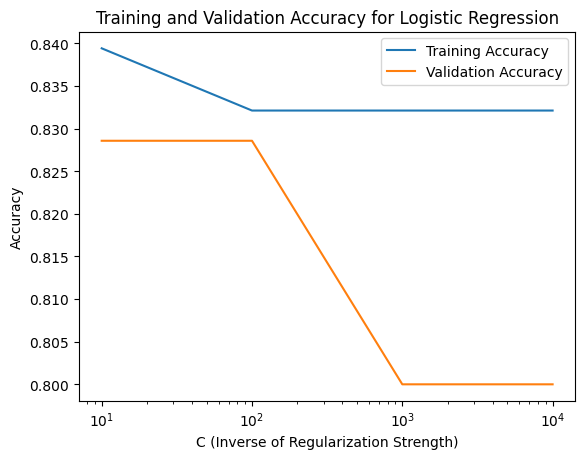

In [63]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Assuming 'X' is your feature matrix and 'y' is the target variable
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize lists to store training and validation accuracy
train_accuracy = []
valid_accuracy = []

# Try different values of C, emphasizing higher values
C_values = [10, 100, 1000, 10000]

for C in C_values:
    # Create a logistic regression model with the specified C
    model = LogisticRegression(C=C, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Predict on training and validation sets
    y_train_pred = model.predict(X_train)
    y_valid_pred = model.predict(X_valid)

    # Calculate accuracy and store in the lists
    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    valid_accuracy.append(accuracy_score(y_valid, y_valid_pred))

# Plot training and validation accuracy
plt.plot(C_values, train_accuracy, label='Training Accuracy')
plt.plot(C_values, valid_accuracy, label='Validation Accuracy')
plt.xscale('log')  # Use a logarithmic scale for better visualization
plt.title('Training and Validation Accuracy for Logistic Regression')
plt.xlabel('C (Inverse of Regularization Strength)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


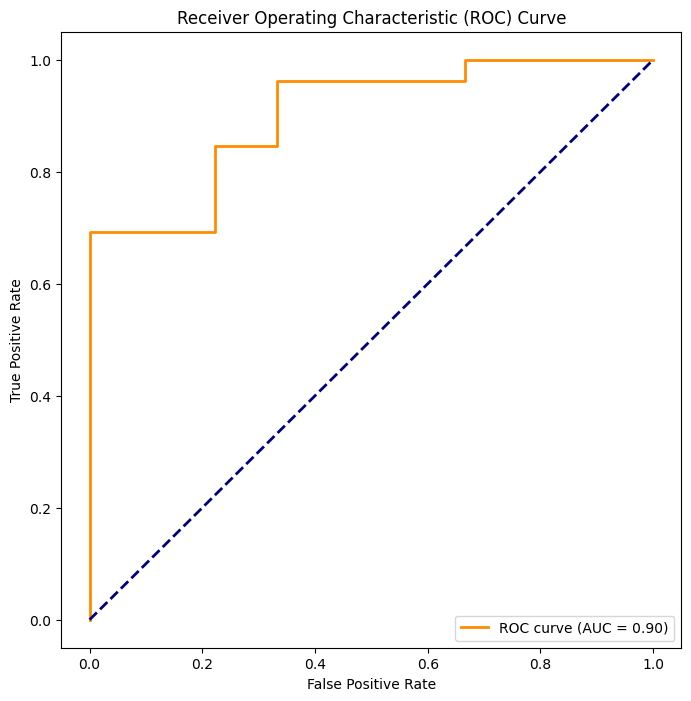

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

# Assuming 'X' is your feature matrix and 'y' is the target variable
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression(C=1000, random_state=42)
model.fit(X_train, y_train)

# Get predicted probabilities for the positive class
y_valid_probs = model.predict_proba(X_valid)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_valid, y_valid_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [106]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, auc

# Assuming 'X' is your feature matrix and 'y' is the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train your logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Get predicted probabilities (scores) for the positive class (class 1)
y_scores = logistic_model.predict_proba(X_test)[:, 1]

# Predict binary labels
y_pred = logistic_model.predict(X_test)

# True labels
y_true = y_test

# Calculate precision and recall
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)

# Alternatively, you can use precision_recall_curve and auc
precision, recall, _ = precision_recall_curve(y_true, y_scores)
pr_auc = auc(recall, precision)

print(f'Precision: {precision[0]:.4f}')
print(f'Recall: {recall[0]:.4f}')
print(f'AUC-PR: {pr_auc:.4f}')

# Calculate F1 score
f1 = f1_score(y_true, y_pred)

print(f'F1 Score: {f1:.4f}')


Precision: 0.7429
Recall: 1.0000
AUC-PR: 0.9410
F1 Score: 0.9057


In [65]:
summary_stats = data.describe()
print(summary_stats)

           gender    10_score    10_board    12_score    12_board   12_stream  \
count  172.000000  172.000000  172.000000  172.000000  172.000000  172.000000   
mean     0.517442    0.544068    0.558140    0.572163    0.430233    1.354651   
std      0.501155    0.194224    0.498058    0.166279    0.496554    0.548076   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.405698    0.000000    0.490939    0.000000    1.000000   
50%      1.000000    0.560945    1.000000    0.576606    0.000000    1.000000   
75%      1.000000    0.661017    1.000000    0.681590    1.000000    2.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    2.000000   

       undergrad_score  undergrad_stream      workex  attended_grad  \
count       172.000000        172.000000  172.000000     172.000000   
mean          0.497195          1.273256    0.511628       0.656977   
std           0.183905          0.508161    0.501324     

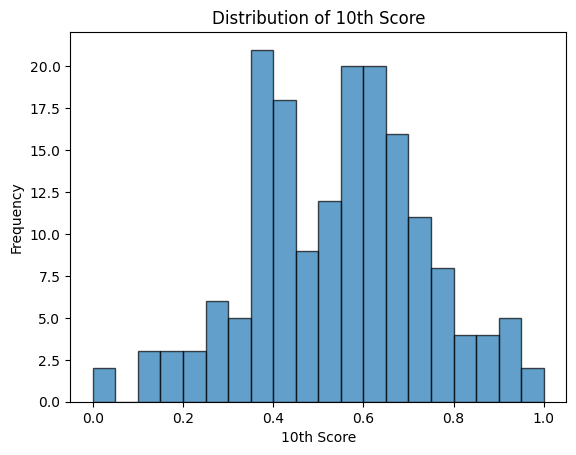

In [66]:
import matplotlib.pyplot as plt

# Distribution plot for '10_score'
plt.hist(data['10_score'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribution of 10th Score')
plt.xlabel('10th Score')
plt.ylabel('Frequency')
plt.show()



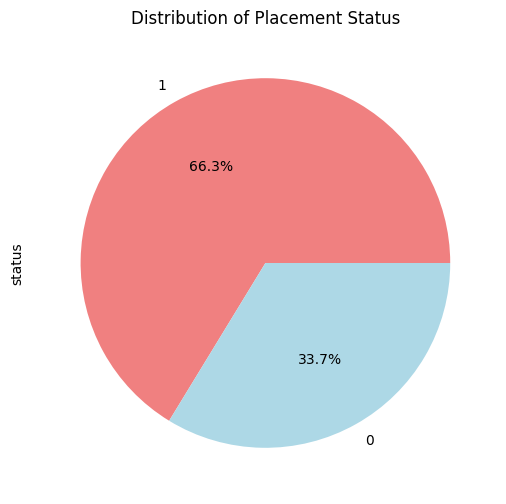

In [67]:
# Pie chart for 'placement status'
plt.figure(figsize=(6, 6))
data['status'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
plt.title('Distribution of Placement Status')
plt.show()


In [68]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, precision_recall_curve, auc
from sklearn.model_selection import train_test_split

# Assuming 'X' is your feature matrix and 'y' is the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train your MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(100, ), max_iter=500)
mlp_model.fit(X_train, y_train)

# Get predicted probabilities (scores) for the positive class (class 1)
y_scores_mlp = mlp_model.predict_proba(X_test)[:, 1]

# Predict binary labels
y_pred_mlp = mlp_model.predict(X_test)

# True labels
y_true_mlp = y_test

# Calculate precision and recall
precision_mlp = precision_score(y_true_mlp, y_pred_mlp)
recall_mlp = recall_score(y_true_mlp, y_pred_mlp)

# Alternatively, you can use precision_recall_curve and auc
precision_mlp_curve, recall_mlp_curve, _ = precision_recall_curve(y_true_mlp, y_scores_mlp)
pr_auc_mlp = auc(recall_mlp_curve, precision_mlp_curve)

print(f'Precision (MLP): {precision_mlp:.4f}')
print(f'Recall (MLP): {recall_mlp:.4f}')
print(f'AUC-PR (MLP): {pr_auc_mlp:.4f}')

# Calculate F1 score
f1_mlp = f1_score(y_true_mlp, y_pred_mlp)

print(f'F1 Score (MLP): {f1_mlp:.4f}')


Precision (MLP): 0.8800
Recall (MLP): 0.8462
AUC-PR (MLP): 0.9478
F1 Score (MLP): 0.8627


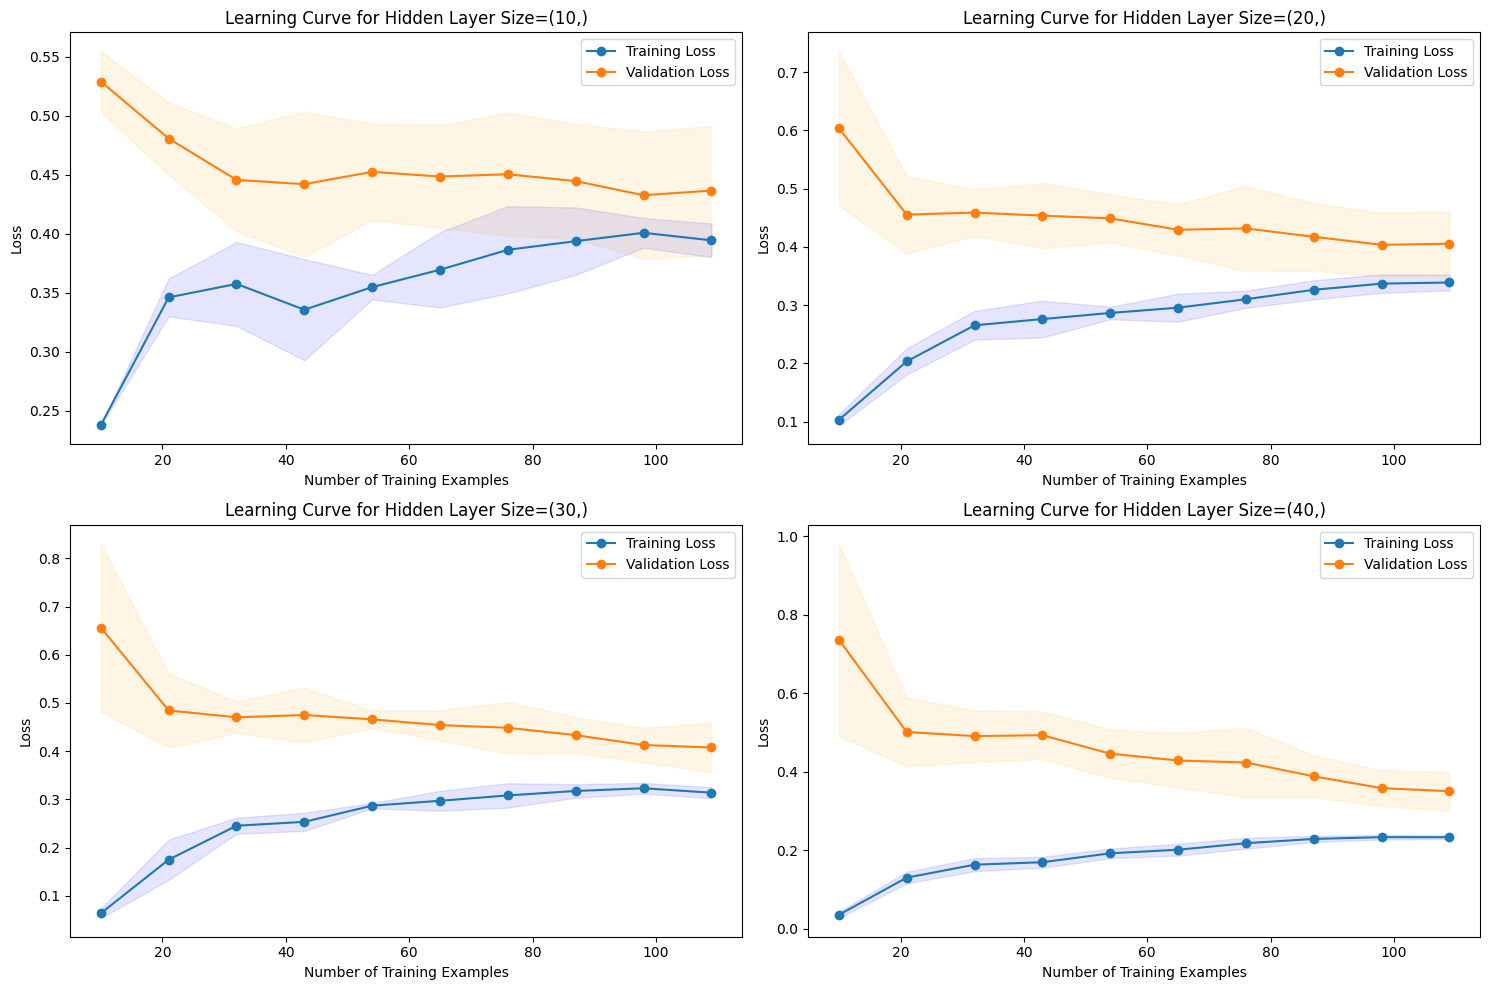

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import learning_curve, train_test_split 

# Assuming 'X' is your feature matrix and 'y' is the target variable
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of values for the number of neurons in the hidden layer
# Experiment with different values, you can adjust the range and granularity
hidden_layer_sizes = [(10,), (20,), (30,), (40,)]

# Create subplots to display learning curves for different hidden layer sizes
plt.figure(figsize=(15, 10))

for i, layer_size in enumerate(hidden_layer_sizes, 1):
    # Create a neural network model with the current hidden layer size
    model = MLPClassifier(hidden_layer_sizes=layer_size, max_iter=500, random_state=42)

    # Plot learning curve
    train_sizes, train_scores, valid_scores = learning_curve(
        model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='neg_log_loss')

    # Calculate mean and standard deviation of training and validation scores
    train_scores_mean = -np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    valid_scores_mean = -np.mean(valid_scores, axis=1)
    valid_scores_std = np.std(valid_scores, axis=1)

    # Plot learning curve for the current hidden layer size
    plt.subplot(2, 2, i)
    plt.plot(train_sizes, train_scores_mean, label='Training Loss', marker='o')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color='blue')
    plt.plot(train_sizes, valid_scores_mean, label='Validation Loss', marker='o')
    plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std,
                     valid_scores_mean + valid_scores_std, alpha=0.1, color='orange')

    plt.title(f'Learning Curve for Hidden Layer Size={layer_size}')
    plt.xlabel('Number of Training Examples')
    plt.ylabel('Loss')
    plt.legend()

plt.tight_layout() 
plt.show()
